# Worksheet 2b: Creating future climate scenarios and analysing change

The following exercises demonstrate analyses of changes in climate simulated using two PRECIS
experiments (driven by HadCM3Q0 and ECHAM5.) As with worksheet 2a, these are just examples
of some of the analyses that you might perform using Python and Iris.

Note: The data used here has been processed in the same way as Worksheet 1. The 8 point-rim
has been removed and it has been converted from PP to netCDF format.

__1a) First, we calculate OND mean precipitation for (a) the HadCM3Q0-driven PRECIS simulation (cahpa) and (b) the ECHAM5-driven simulation (cahpb):


In [3]:
# Ensure you have iris 1.10 or greater
import iris
import iris.coord_categorisation

iris.FUTURE.netcdf_no_unlimited = True

path_in_cahpa = "monthly/cahpa/05216/"
path_clim = "monthly/climatology/"

jobids = ['cahpa', 'cahpb']

for jobid in jobids:
    path_in = 'monthly/' + jobid + '/05216/'
    data = iris.load_cube(path_in + jobid + 'a.pm.2150.05216.rr8.mmday.nc')

# in order to calculate OND mean, we divide the months into two seasons, one for OND and a second for the remaining months
    iris.coord_categorisation.add_season(data, 'time', name='seasons', seasons=('jfmamjjas','ond'))

# Extract the data for the OND season only
    data_ond = data.extract(iris.Constraint(seasons='ond'))
    print 'This is the seasonal OND constrained cube'
    print data_ond
    print 

# Now calculate the mean over the OND season
    future_ond_mean = data_ond.aggregated_by(['seasons'], iris.analysis.MEAN)
    print 'This is the seasonal OND mean cube for the future period 2021-2050'
    print future_ond_mean
    print

# save the OND mean as a netCDF
    iris.save(future_ond_mean, path_clim + jobid + 'a.OND.mean.future.05216.mmday.nc')
    print 'The cube has been saved to the monthly/climatology/ directory'

This is the seasonal OND constrained cube
precipitation_flux / (kg m-2 day-1) (time: 90; grid_latitude: 192; grid_longitude: 192)
     Dimension coordinates:
          time                           x                  -                    -
          grid_latitude                  -                  x                    -
          grid_longitude                 -                  -                    x
     Auxiliary coordinates:
          seasons                        x                  -                    -
          latitude                       -                  x                    x
          longitude                      -                  x                    x
     Attributes:
          Conventions: CF-1.5
          history: 2012-10-23 11:54:15 UTC Aggregated by cf-python v0.9.3.3
          lbproc: 128
          runid: cahpa
          stash_code: 5216
          submodel: 1
     Cell methods:
          mean: time

This is the seasonal OND mean cube for the future period 2

/opt/scitools/environments/default/2017_06_07/lib/python2.7/site-packages/iris/fileformats/netcdf.py:2281: IrisDeprecation: NetCDF default saving behaviour currently assigns the outermost dimensions to unlimited. This behaviour is to be deprecated, in favour of no automatic assignment. To switch to the new behaviour, set iris.FUTURE.netcdf_no_unlimited to True.
  warn_deprecated(msg)


This is the seasonal OND constrained cube
precipitation_flux / (mm day-1)     (time: 90; grid_latitude: 192; grid_longitude: 192)
     Dimension coordinates:
          time                           x                  -                    -
          grid_latitude                  -                  x                    -
          grid_longitude                 -                  -                    x
     Auxiliary coordinates:
          seasons                        x                  -                    -
          latitude                       -                  x                    x
          longitude                      -                  x                    x
     Attributes:
          Conventions: CF-1.5
          history: 2012-10-23 11:56:51 UTC Aggregated by cf-python v0.9.3.3
          lbproc: 128
          runid: cahpb
          stash_code: 5216
          submodel: 1
     Cell methods:
          mean: time

This is the seasonal OND mean cube for the future period 2

__1b) Next, we subtract the baseline mean from the future for OND to get the change in precipitation from both simulations.  The changes are also converted to percentages

In [4]:
import iris

path_clim = "monthly/climatology/"
jobids = ['cahpa', 'cahpb']

for jobid in jobids:
    OND_baseline = iris.load_cube(path_clim + jobid + 'a.OND.mean.baseline.05216.mmday.nc')
    OND_future = iris.load_cube(path_clim + jobid + 'a.OND.mean.future.05216.mmday.nc')
    diff = iris.analysis.maths.subtract(OND_future, OND_baseline)
    iris.save(diff, path_clim + jobid + 'a.OND.mean.diff.05216.nc')
    pcent_change = iris.analysis.maths.divide(iris.analysis.maths.multiply(diff, 100.0), OND_baseline)
    iris.save(pcent_change, path_clim + jobid + 'a.OND.mean.diff.05216.perc.nc')

__2a) Repeat the calculations above for temperature. First, we calculate the OND mean temperatures

In [5]:
# Ensure you have iris 1.10 or greater
import iris
import iris.coord_categorisation

path_clim = "monthly/climatology/"

jobids = ['cahpa', 'cahpb']
time_periods = ['6190', '2150']
time_period_names = ['baseline', 'future']

for jobid in jobids:
    for n, timep in enumerate(time_periods):
        path_in = 'monthly/' + jobid + '/03236/'
        data = iris.load_cube(path_in + jobid + 'a.pm.' + timep + '.03236.rr8.nc')

# in order to calculate OND mean, we divide the months into two seasons, one for OND and a second for the remaining months
        iris.coord_categorisation.add_season(data, 'time', name='seasons', seasons=('jfmamjjas','ond'))

# Extract the data for the OND season only
        data_ond = data.extract(iris.Constraint(seasons='ond'))
        print 'This is the seasonal OND constrained cube'
        print data_ond
        print 

# Now calculate the mean over the OND season
        ond_mean = data_ond.aggregated_by(['seasons'], iris.analysis.MEAN)
        print 'This is the seasonal OND mean cube for the ' + time_period_names[n] + ' period'
        print ond_mean
        print

# save the OND mean as a netCDF
        iris.save(ond_mean, path_clim + jobid + 'a.OND.mean.' + time_period_names[n] + '.03236.nc')
        print 'The cube has been saved to the monthly/climatology/ directory'

This is the seasonal OND constrained cube
air_temperature / (K)               (time: 90; grid_latitude: 192; grid_longitude: 192)
     Dimension coordinates:
          time                           x                  -                    -
          grid_latitude                  -                  x                    -
          grid_longitude                 -                  -                    x
     Auxiliary coordinates:
          seasons                        x                  -                    -
          latitude                       -                  x                    x
          longitude                      -                  x                    x
     Scalar coordinates:
          height: 1.5 m
     Attributes:
          Conventions: CF-1.5
          history: 2012-09-27 11:08:17 UTC Aggregated by cf-python v0.9.3.3
          lbproc: 128
          runid: cahpa
          stash_code: 3236
          submodel: 1
     Cell methods:
          mean: time

This is t

__2b) Next, we calculate the differences between the baseline and future periods.

In [6]:
path_clim = "monthly/climatology/"

jobids = ['cahpa', 'cahpb']

for jobid in jobids:
    OND_baseline = iris.load_cube(path_clim + jobid + 'a.OND.mean.baseline.03236.nc')
    OND_future = iris.load_cube(path_clim + jobid + 'a.OND.mean.future.03236.nc')
    diff = iris.analysis.maths.subtract(OND_future, OND_baseline)
    iris.save(diff, path_clim + jobid + 'a.OND.mean.diff.03236.nc')

__4) Plot the precipitation changes (in %) and temperature changes (deg.C)

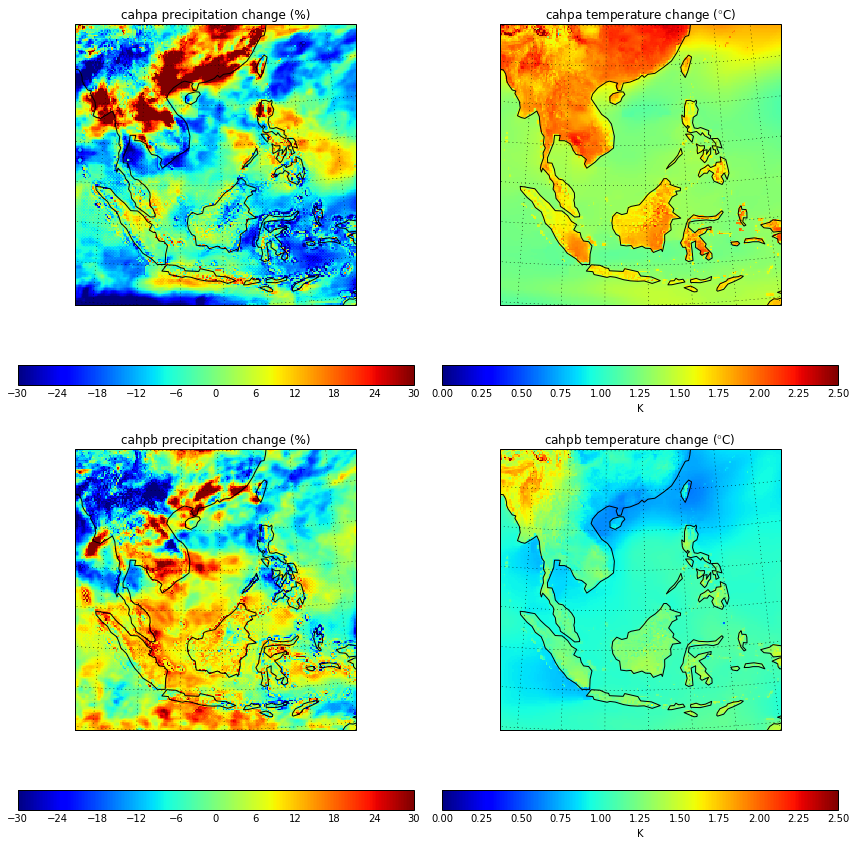

In [7]:
%matplotlib inline 
# do not delete - needed ipython function

# import the iris, matplotlib and iris quickplot libraries
import iris
import matplotlib.pyplot as plt
import iris.quickplot as qplt

path_clim = "monthly/climatology/"

# Create a figure of the size 12x12 inches
plt.figure(figsize=(12, 12))

# Read in the percentage changes in precipitation
jobids = ['cahpa', 'cahpb']

for n, jobid in enumerate(jobids):
    pcent_change = iris.load_cube(path_clim + jobid + 'a.OND.mean.diff.05216.perc.nc')
    degc_change = iris.load_cube(path_clim + jobid + 'a.OND.mean.diff.03236.nc')

    plot_num = n*2 + 1
    plt.subplot(2, 2, plot_num) # Create a new subplot with 2 rows, 2 columns, 1st plot
    qplt.pcolormesh(pcent_change[0], vmax=30, vmin=-30)
    plt.title(jobid + ' precipitation change (%)')
    ax = plt.gca()              # gca function that returns the current axes
    ax.coastlines()             # adds coastlines defined by the axes of the plot
    ax.gridlines()              # adds x and y grid lines to the plot

    plt.subplot(2, 2, plot_num+1)
    qplt.pcolormesh(degc_change[0], vmax=2.5, vmin=0)
    plt.title(jobid + ' temperature change ($\degree$C)')
    ax = plt.gca()
    ax.coastlines()
    ax.gridlines()

plt.tight_layout()          # automatically adjusts subplot(s) to fit in to the figure area
plt.show()

## 2.8 Future time series

__1a) Calculate and then plot a 2021-2050 monthly time series of precipitation anomalies for land
points only relative to the 1961-1990 baseline monthly mean. Do this for both cahpa and cahpb.


In [8]:
import iris
import iris.coord_categorisation

iris.FUTURE.netcdf_no_unlimited = True

path_clim = "monthly/climatology/"

# Read in the land-sea mask. Land points have a value 1, sea points are set to the fill value
land_sea_mask = iris.load_cube('landmask.nc')

jobids = ['cahpa', 'cahpb']

for jobid in jobids:
# Read in original data for baseline and future
    path_in = 'monthly/' + jobid + '/05216/'
    baseline = iris.load_cube(path_in + jobid + 'a.pm.6190.05216.rr8.mmday.nc')
    future = iris.load_cube(path_in + jobid + 'a.pm.2150.05216.rr8.mmday.nc')

# Apply land mask. Probably not most efficient method. baseline / future data arrays are changed to masked type
    for t in range(len(baseline.coord('time').points)):
        baseline[t].data = baseline[t].data * land_sea_mask.data
        future[t].data = future[t].data * land_sea_mask.data

# Calculate mean values over land points
    baseline_land = baseline.collapsed(['grid_longitude', 'grid_latitude'], iris.analysis.MEAN)
    future_land = future.collapsed(['grid_longitude', 'grid_latitude'], iris.analysis.MEAN)

# Save the area averaged monthly differences
    iris.save(baseline_land, path_clim + jobid + 'a.baseline.tseries.05216.nc')
    iris.save(future_land, path_clim + jobid + 'a.future.tseries.05216.nc')

# Subtract baseline from future and save
    diff = future_land.copy()
    diff.data = future_land.data - baseline_land.data

# Save the area averaged monthly differences
    iris.save(diff, path_clim + jobid + 'a.future.tseries.diff.05216.nc')
    print 'The cube has been saved to ' + path_clim + jobid + 'a.future.tseries.diff.05216.nc'

/opt/scitools/environments/default/2017_06_07/lib/python2.7/site-packages/iris/cube.py:3281: UserWarning: Collapsing spatial coordinate u'grid_latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/opt/scitools/environments/default/2017_06_07/lib/python2.7/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for u'grid_latitude'.
  warnings.warn(msg.format(self.name()))
/opt/scitools/environments/default/2017_06_07/lib/python2.7/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for u'grid_longitude'.
  warnings.warn(msg.format(self.name()))
/opt/scitools/environments/default/2017_06_07/lib/python2.7/site-packages/iris/coords.py:1013: UserWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for u'latitude'.
  warnings.warn(msg.format(self.name()))
/opt/scitools/environments/default/2017_0

The cube has been saved to monthly/climatology/cahpaa.future.tseries.diff.05216.nc
The cube has been saved to monthly/climatology/cahpba.future.tseries.diff.05216.nc


__1b) Plot the precipitation anomalies of cahpa and cahpb

In [9]:
%matplotlib inline
# do not delete - needed ipython function

import iris
import iris.plot as iplt
import matplotlib.pyplot as plt

path_clim = "monthly/climatology/"

# Read in the monthly series
cahpa = iris.load_cube(path_clim + 'cahpaa.future.tseries.diff.05216.nc')
cahpb = iris.load_cube(path_clim + 'cahpba.future.tseries.diff.05216.nc')

# Plot the two series on the same figure
iplt.plot(cahpa)
iplt.plot(cahpb)

plt.show()


TypeError: astimezone() argument 1 must be datetime.tzinfo, not tuple